<a href="https://colab.research.google.com/github/chitsikaR/CHTTEN011_FinalYearProject/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/dos_dataset/extracted.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1245798 non-null  int64  
 1    Source Port                 1245798 non-null  int64  
 2    Destination IP              1245798 non-null  int64  
 3    Destination Port            1245798 non-null  int64  
 4    Protocol                    1245798 non-null  int64  
 5   Total Length of Fwd Packets  1245798 non-null  float64
 6    Fwd Packet Length Max       1245798 non-null  float64
 7    Fwd Packet Length Min       1245798 non-null  float64
 8    Fwd Packet Length Mean      1245798 non-null  float64
 9   Bwd Packet Length Max        1245798 non-null  float64
 10   Bwd Packet Length Min       1245798 non-null  float64
 11   Bwd Packet Length Mean      1245798 non-null  float64
 12   Bwd Packet Length Std       1245798 non-n

In [ ]:
df.head()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,0,57177,3232248324,19971,6,24.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,37782.4,84394.038571,62970.666667,109064.063927,0,21.173880,6.0,6.0,6.0,0.0,0,1,0,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
1,1,31536,3232248324,23,6,12.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,61.0,102.190998,2.000000,0.000000,0,10928.961749,6.0,6.0,6.0,0.0,0,1,0,0,7.5,6.0,6.0,12,24616,0,0.0,1,2
2,2,52312,3232248324,20889,6,24.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,33799.4,75500.073515,56332.333333,97566.133317,0,23.669059,6.0,6.0,6.0,0.0,0,1,0,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
3,3,44853,3232248324,1274,6,24.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0,30316.6,67697.214469,50527.666667,87511.289702,0,26.388183,6.0,6.0,6.0,0.0,0,1,0,0,7.0,6.0,6.0,24,1024,0,0.0,1,2
4,4,648,3232248324,35182,17,458.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,3.0,0.000000,3.000000,0.000000,0,666666.666667,229.0,229.0,229.0,0.0,0,0,0,0,343.5,229.0,0.0,458,-1,-1,0.0,1,2


In [ ]:
df.describe()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,6.228985e+05,2.302203e+04,3.166084e+09,3.186662e+04,1.486217e+01,1.069863e+03,4.679689e+02,4.562818e+02,4.597351e+02,1.475077e+01,1.725317e+00,5.181360e+00,3.952797e+00,2.181317e+05,3.961819e+05,2.936620e+05,4.491561e+05,8.118491e-03,1.228033e+06,4.562034e+02,4.765040e+02,4.608991e+02,2.453121e+03,8.118491e-03,1.699826e-01,2.298206e-02,1.019186e-02,6.812989e+02,4.597351e+02,5.181360e+00,1.069863e+03,1.205828e+03,1.214158e+02,1.914283e+05,9.624289e-01,3.339989e+00
std,3.596310e+05,2.447340e+04,4.198623e+08,1.958453e+04,4.363049e+00,1.441733e+03,4.837410e+02,4.815043e+02,4.801285e+02,1.730104e+02,1.246812e+01,5.426732e+01,5.142089e+01,1.008884e+06,1.777128e+06,1.293623e+06,2.018263e+06,8.973621e-02,9.192624e+05,4.814801e+02,5.001346e+02,4.795755e+02,3.517655e+04,8.973621e-02,3.756177e-01,1.498463e-01,1.004390e-01,7.221197e+02,4.801285e+02,5.426732e+01,1.441733e+03,3.331159e+03,2.118996e+03,1.175897e+06,1.901566e-01,1.832971e+00
min,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.114492e+05,7.690000e+02,3.232248e+09,1.479500e+04,1.700000e+01,4.580000e+02,2.290000e+02,2.290000e+02,2.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.921569e+04,2.290000e+02,2.290000e+02,2.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.435000e+02,2.290000e+02,0.000000e+00,4.580000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,6.228985e+05,9.447000e+03,3.232248e+09,3.190300e+04,1.700000e+01,4.940000e+02,2.470000e+02,2.470000e+02,2.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06,2.470000e+02,2.470000e+02,2.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.705000e+02,2.470000e+02,0.000000e+00,4.940000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,9.343478e+05,4.755075e+04,3.232248e+09,4.894600e+04,1.700000e+01,1.398000e+03,4.840000e+02,4.720000e+02,4.720000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06,4.720000e+02,4.850000e+02,4.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.080000e+02,4.720000e+02,0.000000e+00,1.398000e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
max,1.245797e+06,6.553400e+04,4.294967e+09,6.553500e+04,1.700000e+01

In [ ]:
#normalizing the data
normalized_df=(df-df.mean())/df.std()

In [ ]:
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.iloc[:,df.columns != 'Label']
y=df.iloc[:,-1]
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1245798 non-null  int64  
 1    Source Port                 1245798 non-null  int64  
 2    Destination IP              1245798 non-null  int64  
 3    Destination Port            1245798 non-null  int64  
 4    Protocol                    1245798 non-null  int64  
 5   Total Length of Fwd Packets  1245798 non-null  float64
 6    Fwd Packet Length Max       1245798 non-null  float64
 7    Fwd Packet Length Min       1245798 non-null  float64
 8    Fwd Packet Length Mean      1245798 non-null  float64
 9   Bwd Packet Length Max        1245798 non-null  float64
 10   Bwd Packet Length Min       1245798 non-null  float64
 11   Bwd Packet Length Mean      1245798 non-null  float64
 12   Bwd Packet Length Std       1245798 non-n

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
normalized_df.describe()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,-8.240064e-17,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186983e-12,8.682086e-13,9.755238e-13,-8.253327e-13,-1.077336e-12,2.138927e-12,2.701441e-12,-2.322818e-12,1.352296e-12,7.837405e-13,1.950589e-12,3.237758e-12,1.526851e-12,-1.568473e-12,-7.298400e-13,7.837405e-13,-3.928092e-12,-2.100294e-12,-3.022469e-13,1.306471e-12,-1.186983e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265760e-13,-1.166242e-12,-2.792804e-12,-4.782956e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732049e+00,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162110e-01,-2.229338e-01,-2.270074e-01,-2.225459e-01,-9.047062e-02,-1.335889e+00,-9.475020e-01,-9.527515e-01,-9.610563e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-1.822172e+00
25%,-8.660244e-01,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,-1.293230e+00,-4.718853e-01,-4.948748e-01,-4.835507e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-7.310472e-01
50%,0.000000e+00,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,-4.345006e-01,-4.588845e-01,-4.460175e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-1.854849e-01
75%,8.660244e-01,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.161664e-01,-2.229338e-01,-2.270051e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,3.280845e-02,1.698744e-02,2.731780e-02,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846

In [ ]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1245798 non-null  float64
 1    Source Port                 1245798 non-null  float64
 2    Destination IP              1245798 non-null  float64
 3    Destination Port            1245798 non-null  float64
 4    Protocol                    1245798 non-null  float64
 5   Total Length of Fwd Packets  1245798 non-null  float64
 6    Fwd Packet Length Max       1245798 non-null  float64
 7    Fwd Packet Length Min       1245798 non-null  float64
 8    Fwd Packet Length Mean      1245798 non-null  float64
 9   Bwd Packet Length Max        1245798 non-null  float64
 10   Bwd Packet Length Min       1245798 non-null  float64
 11   Bwd Packet Length Mean      1245798 non-null  float64
 12   Bwd Packet Length Std       1245798 non-n

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Label   1245798 non-null  int64
dtypes: int64(1)
memory usage: 9.5 MB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=42)
y_train = np.array(y_train)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))

In [ ]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(934348, 35), ytrain=(934348, 1), xtest=(311450, 35), ytest=(311450, 1)


In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1])) #,1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.999993578423503


In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Decision Tree')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Decision Tree
Accuracy =  99.9993578423503
Confusion Matrix =
 [[14236     0     0     0     0     0     0     0]
 [    0 49917     0     0     0     0     0     0]
 [    0     0 49871     0     0     0     0     0]
 [    0     0     0 50292     0     0     0     0]
 [    1     0     0     0 46598     0     0     0]
 [    0     0     0     0     0 50181     0     0]
 [    1     0     0     0     0     0 49898     0]
 [    0     0     0     0     0     0     0   455]]
Recall = 0.999993578423503
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14236
           1       1.00      1.00      1.00     49917
           2       1.00      1.00      1.00     49871
           3       1.00      1.00      1.00     50292
           4       1.00      1.00      1.00     46599
           5       1.00      1.00      1.00     50181
           6       1.00      1.00      1.00     49899
           7       1.00      1.00      1.00

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

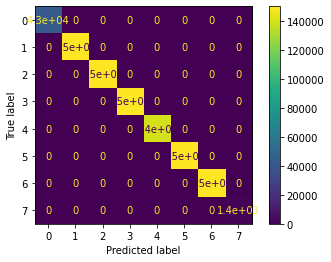

In [ ]:
plot_confusion_matrix(model, X_train, y_train)
plt.show()